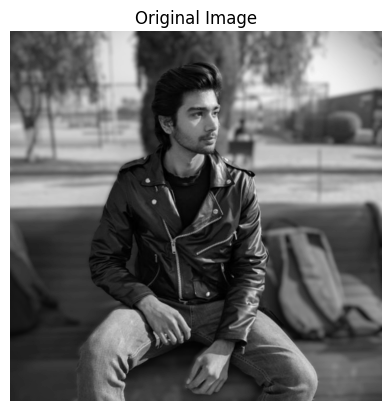

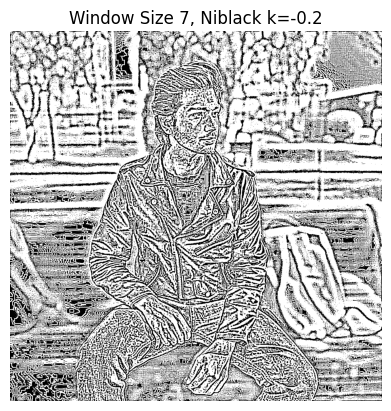

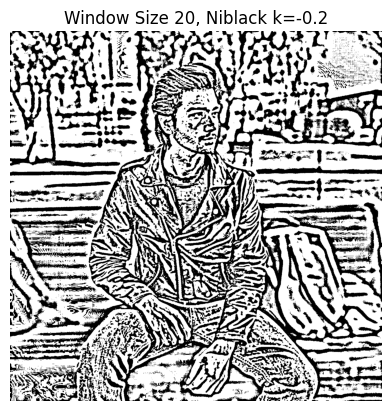

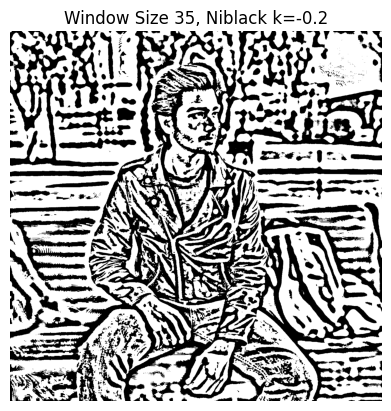

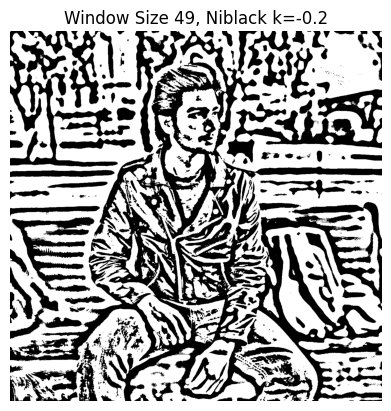

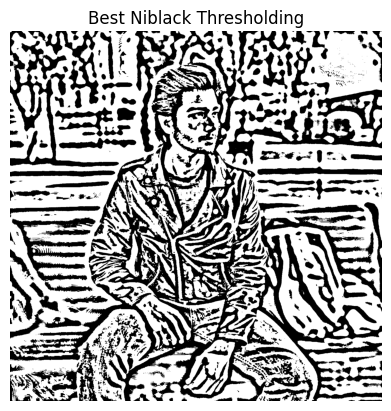

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def niblack_threshold(img, window_size, k=-0.2):
    half_win = window_size // 2
    
    # Compute the mean using a box filter (efficient)
    mean = cv2.boxFilter(img.astype(np.float32), ddepth=-1, ksize=(window_size, window_size))
    
    # Compute squared mean
    mean_sq = cv2.sqrBoxFilter(img.astype(np.float32), ddepth=-1, ksize=(window_size, window_size))
    
    # Compute standard deviation (Ensure no negative values inside sqrt)
    std = np.sqrt(np.clip(mean_sq - mean ** 2, 0, None))
    
    # Replace NaN values with zero (optional)
    std = np.nan_to_num(std)
    
    # Compute threshold using Niblack formula
    threshold = mean + k * std
    
    # Apply thresholding
    binary_output = np.where(img > threshold, 255, 0).astype(np.uint8)
    
    return binary_output

# Load image
image = cv2.imread('input.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title(f'Original Image')
plt.axis('off')
plt.show()


# Experiment with different window sizes
window_sizes = [7, 20, 35, 49]
results = {}

for win_size in window_sizes:
    results[win_size] = niblack_threshold(image, win_size)
    plt.figure()
    plt.imshow(results[win_size], cmap='gray')
    plt.title(f'Window Size {win_size}, Niblack k=-0.2')
    plt.axis('off')
    plt.show()

best_window_size = window_sizes[2]  
best_result = niblack_threshold(image, best_window_size)
cv2.imwrite('niblack_best.png', best_result)
plt.figure()
plt.imshow(best_result, cmap='gray')
plt.title('Best Niblack Thresholding')
plt.axis('off')
plt.show()
